In [97]:
!pip install plotly --upgrade

In [98]:
#IMPORT THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup
from datetime import datetime as dt

## **1. WEB SCRAPPING FOR THE DATA**



**WEB SCRAPPING DATA FROM** -> **List of Earthquake in 2023 website** (https://en.wikipedia.org/wiki/List_of_earthquakes_in_2023)


In [99]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [100]:
page=requests.get('https://en.wikipedia.org/wiki/List_of_earthquakes_in_2023', headers = headers).text
page

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of earthquakes in 2023 - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-

In [101]:
soup=BeautifulSoup(page,'lxml')


In [102]:
html_code = str(soup.find_all('table', class_="wikitable", style="text-align:center")[0])
html_code

'<table class="wikitable" style="text-align:center">\n<caption>Number of earthquakes worldwide for 2013–2023\n</caption>\n<tbody><tr>\n<th>Magnitude\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2013" title="List of earthquakes in 2013">2013</a>\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2014" title="List of earthquakes in 2014">2014</a>\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2015" title="List of earthquakes in 2015">2015</a>\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2016" title="List of earthquakes in 2016">2016</a>\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2017" title="List of earthquakes in 2017">2017</a>\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2018" title="List of earthquakes in 2018">2018</a>\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2019" title="List of earthquakes in 2019">2019</a>\n</th>\n<th><a href="/wiki/List_of_earthquakes_in_2020" title="List of earthquakes in 2020">2020</a>\n</th>\n<th><a href="/wiki/List_of_earthqua

In [103]:
soup = BeautifulSoup(html_code, 'html.parser')
table = soup.find('table')
headers = [th.text.strip() for th in table.find_all('th')]

# EXTRACT ROWS
data = []
for row in table.find_all('tr'):
    cells = [td.text.strip().replace(',', '') for td in row.find_all(['th', 'td'])]
    data.append(cells)

#MAKE A CORRECT DATAFRAME
no_of_earthquake = pd.DataFrame(data[1:], columns=data[0])
no_of_earthquake

Magnitude   2013   2014   2015   2016   2017   2018   2019   2020   2021  \
0   8.0–9.9      2      1      1      0      1      1      1      0      3   
1   7.0–7.9     17     11     18     16      6     16      9      9     16   
2   6.0–6.9    123    143    127    131    104    118    135    111    141   
3   5.0–5.9   1460   1580   1413   1550   1447   1671   1484   1315   2046   
4   4.0–4.9  11877  15817  13777  13700  10544  12782  11897  12135  14643   
5     Total  13480  17552  15336  15397  12102  14589  13530  13572  16849   

    2022   2023  
0      0      0  
1     11     19  
2    117    128  
3   1603   1637  
4  13707  13816  
5  15438  15600

In [104]:
no_of_earthquake.columns

Index(['Magnitude', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')

In [105]:
no_of_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Magnitude  6 non-null      object
 1   2013       6 non-null      object
 2   2014       6 non-null      object
 3   2015       6 non-null      object
 4   2016       6 non-null      object
 5   2017       6 non-null      object
 6   2018       6 non-null      object
 7   2019       6 non-null      object
 8   2020       6 non-null      object
 9   2021       6 non-null      object
 10  2022       6 non-null      object
 11  2023       6 non-null      object
dtypes: object(12)
memory usage: 704.0+ bytes


In [106]:
no_of_earthquake.describe()

Magnitude 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
count          6    6    6    6    6    6    6    6    6    6    6    6
unique         6    6    6    6    6    6    6    6    6    6    6    6
top      8.0–9.9    2    1    1    0    1    1    1    0    3    0    0
freq           1    1    1    1    1    1    1    1    1    1    1    1

In [107]:
no_of_earthquake.isnull().sum()

Magnitude    0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
2021         0
2022         0
2023         0
dtype: int64

In [108]:
no_of_earthquake.shape

(6, 12)

In [109]:
no_of_earthquake.nunique

<bound method DataFrame.nunique of   Magnitude   2013   2014   2015   2016   2017   2018   2019   2020   2021  \
0   8.0–9.9      2      1      1      0      1      1      1      0      3   
1   7.0–7.9     17     11     18     16      6     16      9      9     16   
2   6.0–6.9    123    143    127    131    104    118    135    111    141   
3   5.0–5.9   1460   1580   1413   1550   1447   1671   1484   1315   2046   
4   4.0–4.9  11877  15817  13777  13700  10544  12782  11897  12135  14643   
5     Total  13480  17552  15336  15397  12102  14589  13530  13572  16849   

    2022   2023  
0      0      0  
1     11     19  
2    117    128  
3   1603   1637  
4  13707  13816  
5  15438  15600  >

**CHANGE THE DATAFRAME STRUCTURE AND MAKE A NEW DATAFRAME**

In [110]:
#MAKE A COLUMN LIST

col_list = no_of_earthquake.columns.tolist()
print(col_list)

['Magnitude', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [111]:
#TOTAL NO OF ROWS

no_of_rows =  no_of_earthquake.shape[0]-1
print(no_of_rows)

5


In [112]:
#MAKE YEAR LIST

year = [i for i in range(int(col_list[1]), int(col_list[-1]) + 1)]
year_list = year*no_of_rows
print(year_list)

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [113]:
#MAKE MAGNITUDE LIST

mag_list = []
for mag in no_of_earthquake['Magnitude'].tolist()[:-1]:
  for no in range(0,len(col_list)-1):
    # print(mag)
    mag_list.append(mag)

print(mag_list)

['8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '8.0–9.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '7.0–7.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '6.0–6.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '5.0–5.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9', '4.0–4.9']


In [114]:
#MAKE A LIST OF TOTAL NUMBER OF EARTHQUAKES

no_of_eq_list = []

for no in range(0,no_of_rows):
  int_no_eq = [int(int_eq) for int_eq in no_of_earthquake.iloc[no].tolist()[1:]]
  for no_eq in int_no_eq:
    no_of_eq_list.append(no_eq)

print(no_of_eq_list)

[2, 1, 1, 0, 1, 1, 1, 0, 3, 0, 0, 17, 11, 18, 16, 6, 16, 9, 9, 16, 11, 19, 123, 143, 127, 131, 104, 118, 135, 111, 141, 117, 128, 1460, 1580, 1413, 1550, 1447, 1671, 1484, 1315, 2046, 1603, 1637, 11877, 15817, 13777, 13700, 10544, 12782, 11897, 12135, 14643, 13707, 13816]


In [115]:
#MAKE A NEW DATAFRAME

eq_mod_df = pd.DataFrame({'year': year_list,
                          'mag': mag_list,
                          'no_of_eq' : no_of_eq_list})

In [116]:
eq_mod_df.head()

year      mag  no_of_eq
0  2013  8.0–9.9         2
1  2014  8.0–9.9         1
2  2015  8.0–9.9         1
3  2016  8.0–9.9         0
4  2017  8.0–9.9         1

## **EXPLORATORY DATA ANALYSIS**

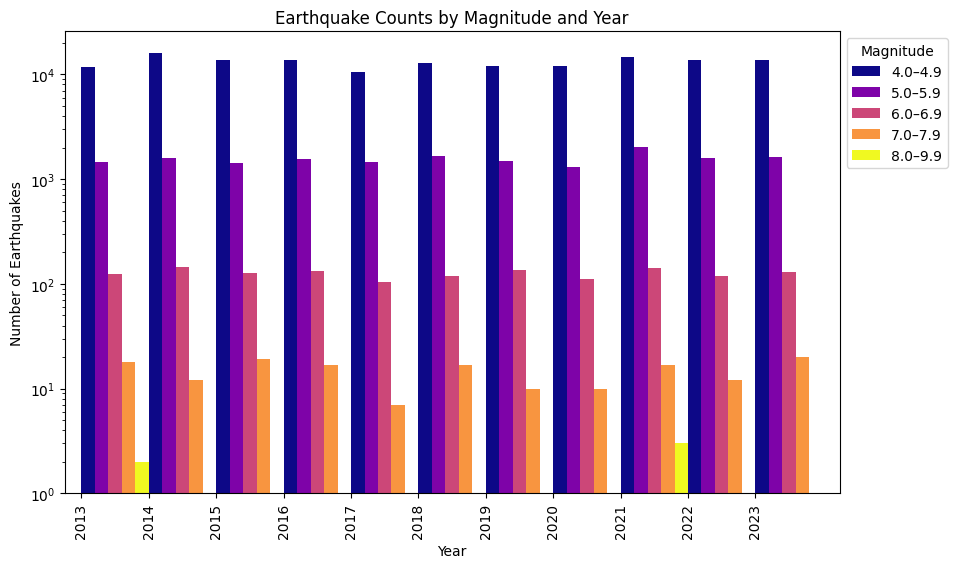

In [117]:
#MAKE A GROUPED BAR CHART EARTHQUAKE COUNTS BY MAGNITUDE AND YEAR

pivot_df = eq_mod_df.pivot(index='year', columns='mag', values='no_of_eq')
pivot_df.plot(kind='bar', colormap='plasma', figsize=(10, 6), log=True, width=1, position=0)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Counts by Magnitude and Year')
plt.legend(title='Magnitude', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [118]:
#MAKE LISTS OF YEAR AND TOTAL NUMBER OF EARTHQUAKE

int_total = [int(int_no) for int_no in no_of_earthquake.iloc[-1].tolist()[1:]]
print(int_total)
print(col_list[1:])

[13480, 17552, 15336, 15397, 12102, 14589, 13530, 13572, 16849, 15438, 15600]
['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [119]:
#MAKE A NEW DATAFRAME

total_df = pd.DataFrame({'Year': col_list[1:],'Total_no_Earthquake':int_total})
total_df

Year  Total_no_Earthquake
0   2013                13480
1   2014                17552
2   2015                15336
3   2016                15397
4   2017                12102
5   2018                14589
6   2019                13530
7   2020                13572
8   2021                16849
9   2022                15438
10  2023                15600

<Axes: ylabel='Total_no_Earthquake'>

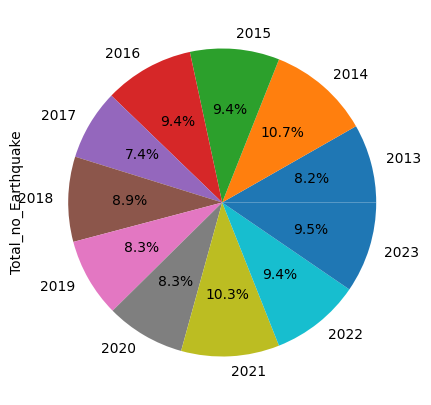

In [120]:
#MAKE A PIE CHART FOR NUMBER OF EARTHQUAKES YEARWISE

total_df.groupby('Year')['Total_no_Earthquake'].sum().plot.pie(autopct='%1.1f%%', figsize=(5,5))

In [121]:
# CREATE A GROUPPED BAR CHART AND LINE CHART BY USING PLOTTLY LIBREARY

pivot_df = eq_mod_df.pivot(index='year', columns='mag', values='no_of_eq')

fig = go.Figure()

for column in pivot_df.columns:
    fig.add_trace(go.Bar(x=pivot_df.index, y=pivot_df[column], name=f'Magnitude {column}', offsetgroup=column))

fig.update_layout(
    title=dict(text='Earthquake Counts by Magnitude and Year', x=0.5, font=dict(size=20)),
    xaxis=dict(title='Year', tickvals=eq_mod_df['year'].unique(), type='category', title_font=dict(size=16, family='Arial', color='black')),
    yaxis=dict(type='log', title='Number of Earthquakes',
               tickvals=[10**i for i in range(4)],
               title_font=dict(size=16, family='Arial', color='black')),
    barmode='group')

fig.show()

## **2. WORKING ON EARTHQUAKE_2023_GLOBAL CSV FILE (SOURCE - USGS WEBSITE)**

In [122]:
eq_global = pd.read_csv('/content/earthquakes_2023_global.csv')    #HERE EARTHQUAKE_2023_GLOBAL CSV FILE UPLOAD

In [123]:
eq_global

time  latitude  longitude    depth   mag magType  \
0      2023-01-01T00:49:25.294Z   52.0999   178.5218   82.770  3.10      ml   
1      2023-01-01T01:41:43.755Z    7.1397   126.7380   79.194  4.50      mb   
2      2023-01-01T03:29:31.070Z   19.1631   -66.5251   24.000  3.93      md   
3      2023-01-01T04:09:32.814Z   -4.7803   102.7675   63.787  4.30      mb   
4      2023-01-01T04:29:13.793Z   53.3965  -166.9417   10.000  3.00      ml   
...                         ...       ...        ...      ...   ...     ...   
26637  2023-12-29T03:37:19.334Z   -6.9527   154.9829   10.000  5.20      mb   
26638  2023-12-29T04:38:54.109Z   32.3262   141.7386   10.000  5.10      mb   
26639  2023-12-29T08:42:05.747Z   -7.2411    68.0663   10.000  5.10      mb   
26640  2023-12-29T11:02:48.679Z  -19.1602   169.0428  153.264  4.70      mb   
26641  2023-12-29T16:31:16.656Z   25.1050    96.5309   10.000  5.00      mb   

        nst    gap     dmin   rms  ...                   updated  \
0      14.0  139.0   0.8700  0.18  ...  2023-03-11T22:51:52.040Z   
1      32.0  104.0   1.1520  0.47  ...  2023-03-11T22:51:45.040Z   
2      23.0  246.0   0.8479  0.22  ...  2023-03-11T22:51:29.040Z   
3      17.0  187.0   0.4570  0.51  ...  2023-03-11T22:51:45.040Z   
4      19.0  190.0   0.4000  0.31  ...  2023-03-11T22:51:38.040Z   
...     ...    ...      ...   ...  ...                       ...   
26637  72.0   60.0   3.9240  0.93  ...  2023-12-29T04:05:57.040Z   
26638  74.0  121.0   1.8030  0.70  ...  2023-12-29T10:59:44.533Z   
26639  60.0   54.0  12.7760  0.57  ...  2023-12-29T08:57:05.040Z   
26640  40.0   61.0   3.7460  0.82  ...  2023-12-29T11:22:46.040Z   
26641  53.0   64.0   4.1560  0.78  ...  2023-12-29T16:45:27.040Z   

                                       place        type horizontalError  \
0      Rat Islands, Aleutian Islands, Alaska  earthquake            8.46   
1            23 km ESE of Manay, Philippines  earthquake            5.51   
2                         Puerto Rico region  earthquake            0.91   
3         99 km SSW of Pagar Alam, Indonesia  earthquake           10.25   
4              59 km SSW of Unalaska, Alaska  earthquake            1.41   
...                                      ...         ...             ...   
26637  89 km SW of Panguna, Papua New Guinea  earthquake           10.07   
26638              Izu Islands, Japan region  earthquake            9.17   
26639              Chagos Archipelago region  earthquake            8.02   
26640          49 km NNW of Isangel, Vanuatu  earthquake            8.52   
26641        92 km WSW of Myitkyina, Myanmar  earthquake            7.85   

      depthError  magError  magNst    status  locationSource magSource  
0         21.213     0.097    14.0  reviewed              us        us  
1          7.445     0.083    43.0  reviewed              us        us  
2         15.950     0.090    16.0  reviewed              pr        pr  
3          6.579     0.238     5.0  reviewed              us        us  
4          1.999     0.085    18.0  reviewed              us        us  
...          ...       ...     ...       ...             ...       ...  
26637      1.765     0.048   141.0  reviewed              us        us  
26638      1.870     0.042   187.0  reviewed              us        us  
26639      1.792     0.090    40.0  reviewed              us        us  
26640      7.433     0.081    46.0  reviewed              us        us  
26641      1.876     0.071    64.0  reviewed              us        us  

[26642 rows x 22 columns]

In [124]:
eq_global.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [125]:
eq_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [126]:
eq_global.describe()

latitude     longitude         depth           mag           nst  \
count  26642.000000  26642.000000  26642.000000  26642.000000  25227.000000   
mean      16.852798    -11.487497     67.491224      4.007395     42.571332   
std       30.389200    130.053399    116.762456      0.794423     37.662352   
min      -65.849700   -179.998700     -3.370000      2.600000      0.000000   
25%       -6.415275   -149.608650     10.000000      3.220000     19.000000   
50%       18.884167    -64.811833     21.998000      4.300000     30.000000   
75%       41.827950    126.965100     66.833000      4.500000     52.000000   
max       86.593900    179.999400    681.238000      7.800000    423.000000   

                gap          dmin           rms  horizontalError  \
count  25225.000000  24776.000000  26642.000000     25093.000000   
mean     124.930971      2.692908      0.581575         7.017267   
std       67.430145      4.043568      0.256276         4.072365   
min        8.000000      0.000000      0.010000         0.000000   
25%       73.000000      0.612000      0.410000         4.140000   
50%      111.000000      1.579000      0.590000         7.060000   
75%      165.000000      3.172000      0.750000         9.730000   
max      350.000000     50.820000      1.880000        99.000000   

         depthError      magError        magNst  
count  26642.000000  24970.000000  25065.000000  
mean       4.475056      0.122735     33.315939  
std        4.451649      0.102271     48.022567  
min        0.000000      0.000000      0.000000  
25%        1.848000      0.080000     10.000000  
50%        2.019000      0.111000     18.000000  
75%        6.669000      0.150000     36.000000  
max       60.670000      4.490000    884.000000

In [127]:
eq_global.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
dtype: int64

In [128]:
eq_global.shape

(26642, 22)

In [129]:
eq_global.nunique()

time               24682
latitude           23850
longitude          24172
depth              13076
mag                  236
magType               15
nst                  297
gap                  426
dmin                9418
rms                  257
net                   15
id                 24682
updated             7847
place              14811
type                   8
horizontalError     2345
depthError          8318
magError            2049
magNst               386
status                 2
locationSource        16
magSource             19
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

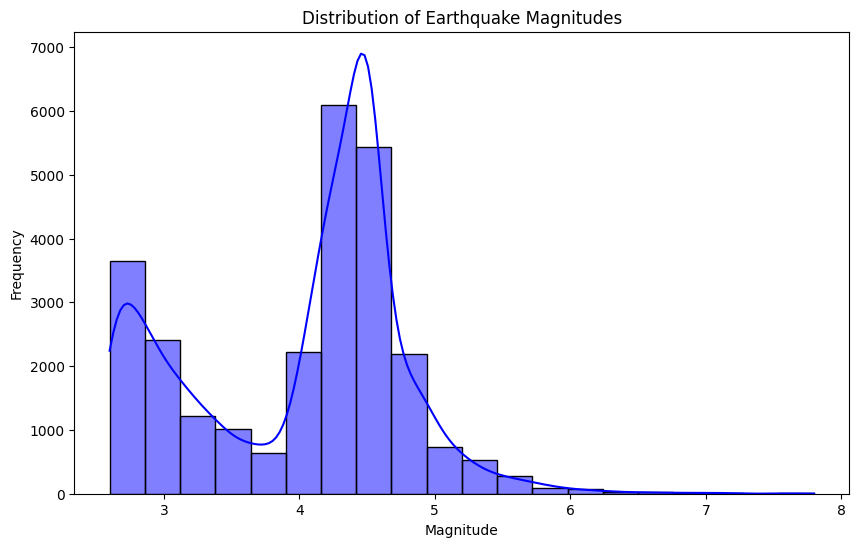

In [130]:
#KERNEL DENSITY ESTIMATION OF THE MAGNITUDE

plt.figure(figsize=(10, 6))
sns.histplot(data = eq_global, x='mag', bins=20, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

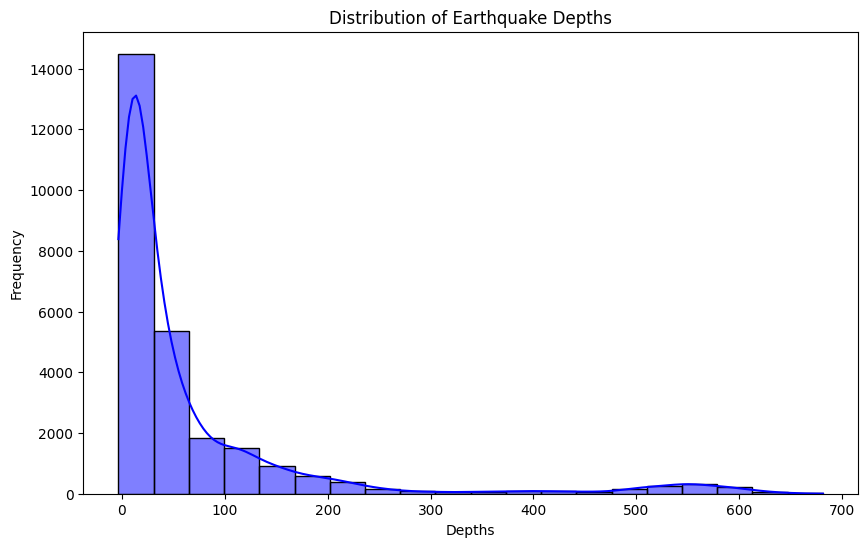

In [131]:
#KERNEL DENSITY ESTIMATION OF THE DEPTHS

plt.figure(figsize=(10, 6))
sns.histplot(data=eq_global,x='depth', bins=20, kde=True, color='blue')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depths')
plt.ylabel('Frequency')
plt.show()

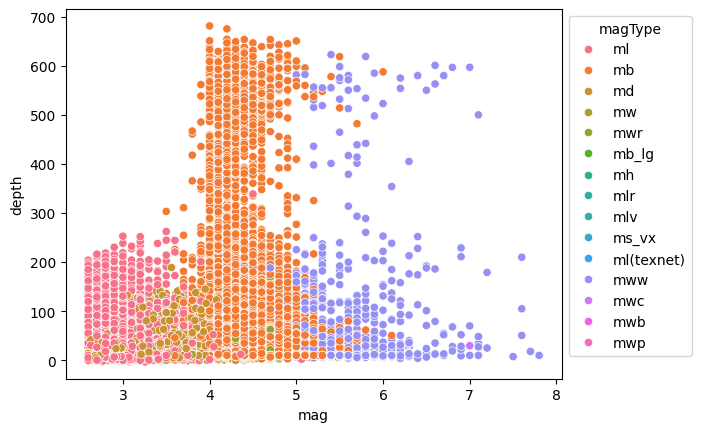

In [132]:
#RELATIONSHIP BETWEEN MAGNITUDE AND DEPTH

sns.scatterplot(data = eq_global, x='mag', y='depth',hue='magType')
plt.legend(title='magType', bbox_to_anchor=(1, 1), loc='upper left')


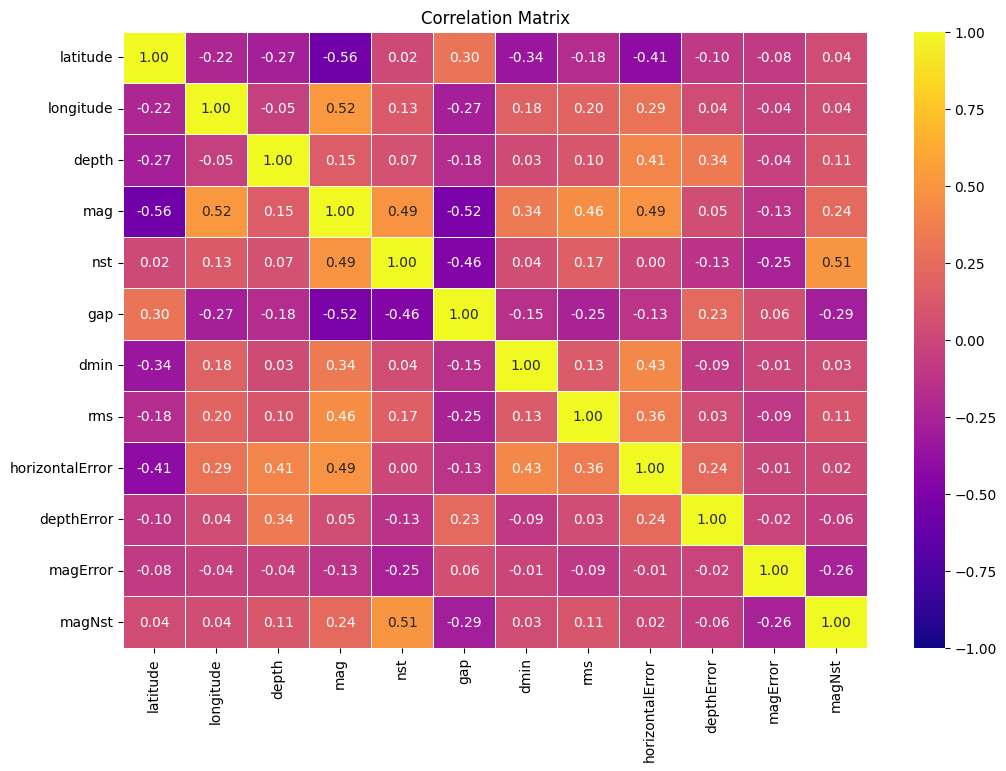

In [133]:
#HERE SHOW THE HETMAP FOR CORRELATIONSHIP BETWEEN ALL COLUMNS FROM THE DATA

numeric_columns = eq_global.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## **TEMPORAL ANALYSIS**

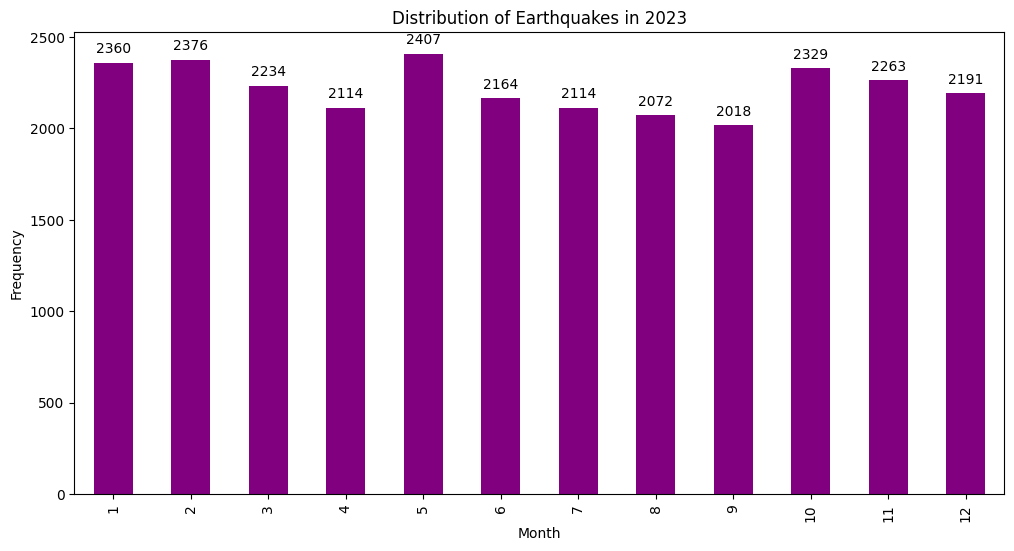

In [134]:
#BARPLOT OF DISTRIBUTION OF EARTHQUAKE IN 2023

eq_global["month"] = pd.to_datetime(eq_global["time"]).dt.month
plt.figure(figsize=(12, 6))
ax = eq_global['month'].value_counts().sort_index().plot(kind='bar', color='purple')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Earthquakes in 2023')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


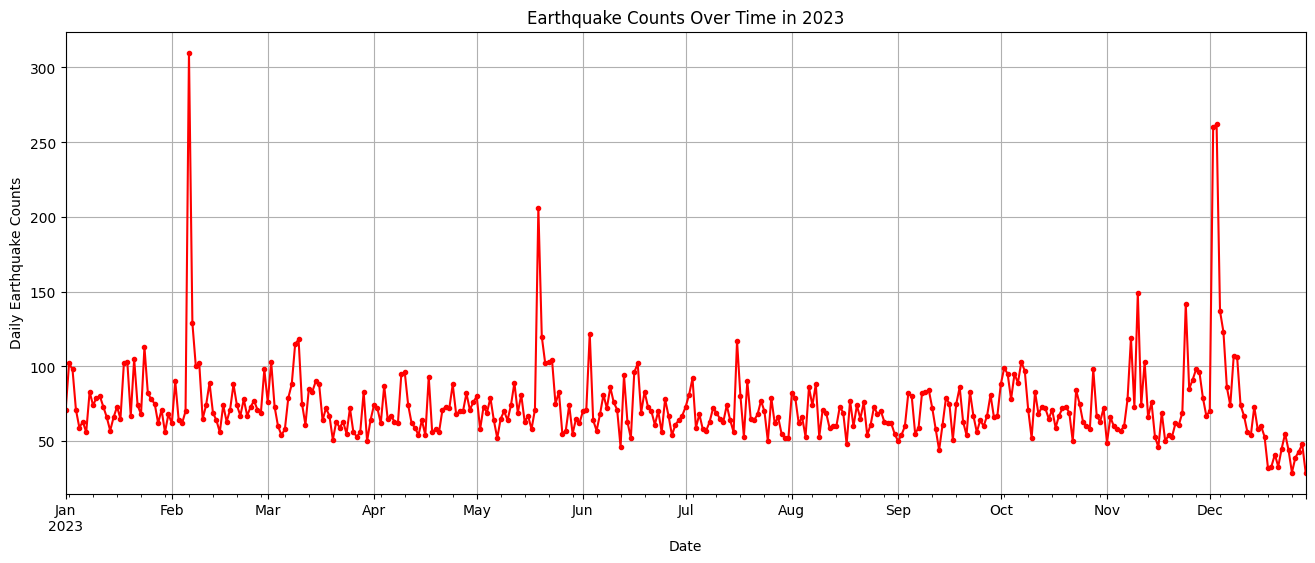

In [135]:
#LINEPLOT OF DISTRIBUTION OF EARTHQUAKE IN 2023

eq_global['time'] = pd.to_datetime(eq_global['time'])
#INSTEAD OF D(MEANS DAYWISE), WE USED M FOR MONTHS AND Y FOR YEARS
daily_counts = eq_global.resample('D', on='time').size()
plt.figure(figsize=(16,6))
daily_counts.plot(kind='line', color='red', marker='o', markersize = 3)
plt.title('Earthquake Counts Over Time in 2023')
plt.xlabel('Date')
plt.ylabel('Daily Earthquake Counts')
plt.grid(True)
plt.show()

## **GEOSPATIAL ANALYSIS**

**MAGNITUDE & DEPTH OF EARTHQUAKES**

In [136]:
# MAGNITUDE VALUES OF THE PARTICULAR LOCATION FOR THW WORLD

fig = px.scatter_mapbox(eq_global[['latitude','longitude','mag']],
                        lat="latitude",
                        lon="longitude",
                        color='mag',
                        zoom=1, height=500)
fig.update_layout(mapbox_style="white-bg",title='Magnitude of Earthquakes',
mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.show()


In [137]:
# DEPTH VALUES OF THE PARTICULAR LOCATION FOR THW WORLD

fig = px.scatter_mapbox(eq_global[['latitude','longitude','depth']],
                        lat="latitude",
                        lon="longitude",
                        color='depth',
                        zoom=1, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## **3. WORKING WITH EARTHQUAKE CSV FILE (SOURCE - KAGGLE)**

In [138]:
eq_df = pd.read_csv('/content/earthquake data.csv')    #HERE UPLOAD THE EARTHQUAKE CSV FILE

In [139]:
eq_df.head()

Date & Time  Latitude  Longitude  Depth  Magnitude     Lands  \
0  11/21/2023 17:43    31.592   -104.549      3        2.7   WESTERN   
1  11/21/2023 17:31   -24.200    -67.580    198        4.0    SALTA,   
2  11/21/2023 17:27    31.647   -104.017      5        2.9   WESTERN   
3  11/21/2023 17:01    46.345     13.601      0        0.8  SLOVENIA   
4  11/21/2023 16:56    -4.320    130.810     10        3.3     BANDA   

     Country  
0      TEXAS  
1  ARGENTINA  
2      TEXAS  
3   SLOVENIA  
4        SEA

In [140]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date & Time  53539 non-null  object 
 1   Latitude     53539 non-null  float64
 2   Longitude    53539 non-null  float64
 3   Depth        53539 non-null  int64  
 4   Magnitude    53539 non-null  float64
 5   Lands        53539 non-null  object 
 6   Country      53539 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [141]:
eq_df['Date & Time'] = pd.to_datetime(eq_df['Date & Time'])

In [142]:
eq_df

Date & Time  Latitude  Longitude  Depth  Magnitude  \
0     2023-11-21 17:43:00    31.592   -104.549      3        2.7   
1     2023-11-21 17:31:00   -24.200    -67.580    198        4.0   
2     2023-11-21 17:27:00    31.647   -104.017      5        2.9   
3     2023-11-21 17:01:00    46.345     13.601      0        0.8   
4     2023-11-21 16:56:00    -4.320    130.810     10        3.3   
...                   ...       ...        ...    ...        ...   
53534 2023-05-14 09:50:00    18.080   -103.270      7        3.5   
53535 2023-05-14 09:49:00    11.520    141.620     10        5.1   
53536 2023-05-14 09:48:00    19.400   -155.240      2        2.2   
53537 2023-05-14 09:28:00    15.890    -93.520    106        3.9   
53538 2023-05-14 09:27:00   -23.970    -67.460    240        3.7   

                      Lands     Country  
0                   WESTERN       TEXAS  
1                    SALTA,   ARGENTINA  
2                   WESTERN       TEXAS  
3                  SLOVENIA    SLOVENIA  
4                     BANDA         SEA  
...                     ...         ...  
53534  OFFSHORE, MICHOACAN,      MEXICO  
53535       STATE, OF, YAP,  MICRONESIA  
53536   ISLAND, OF, HAWAII,      HAWAII  
53537              CHIAPAS,      MEXICO  
53538          ANTOFAGASTA,       CHILE  

[53539 rows x 7 columns]

In [143]:
eq_df.columns

Index(['Date & Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Lands',
       'Country'],
      dtype='object')

In [144]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date & Time  53539 non-null  datetime64[ns]
 1   Latitude     53539 non-null  float64       
 2   Longitude    53539 non-null  float64       
 3   Depth        53539 non-null  int64         
 4   Magnitude    53539 non-null  float64       
 5   Lands        53539 non-null  object        
 6   Country      53539 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 2.9+ MB


In [145]:
eq_df.describe()

Latitude     Longitude         Depth     Magnitude
count  53539.000000  53539.000000  53539.000000  53539.000000
mean      21.120630    -15.421862     35.799959      2.962569
std       25.645429     93.129891     67.580186      0.893910
min      -65.899000   -179.992000     -4.000000     -0.700000
25%        8.485000    -94.570000      6.000000      2.300000
50%       29.320000     -8.373000     10.000000      2.900000
75%       38.470000     37.460000     32.000000      3.500000
max       85.330000    180.000000    750.000000      7.700000

In [146]:
eq_df.isnull().sum()

Date & Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Lands          0
Country        0
dtype: int64

In [147]:
eq_df.shape

(53539, 7)

In [148]:
eq_df.nunique()

Date & Time    48909
Latitude       22443
Longitude      29520
Depth            566
Magnitude         75
Lands            722
Country          187
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

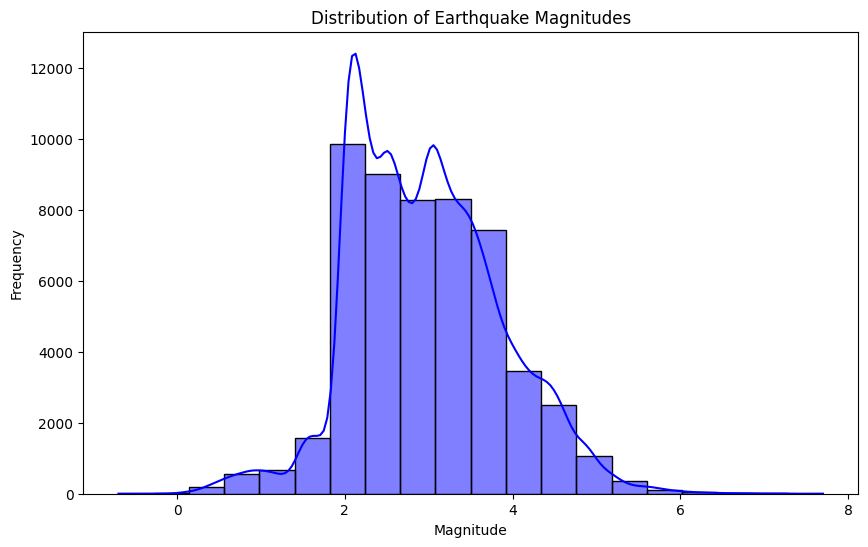

In [149]:
#KERNEL DENSITY ESTIMATION OF THE MAGNITUDE

plt.figure(figsize=(10, 6))
sns.histplot(eq_df['Magnitude'], bins=20, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

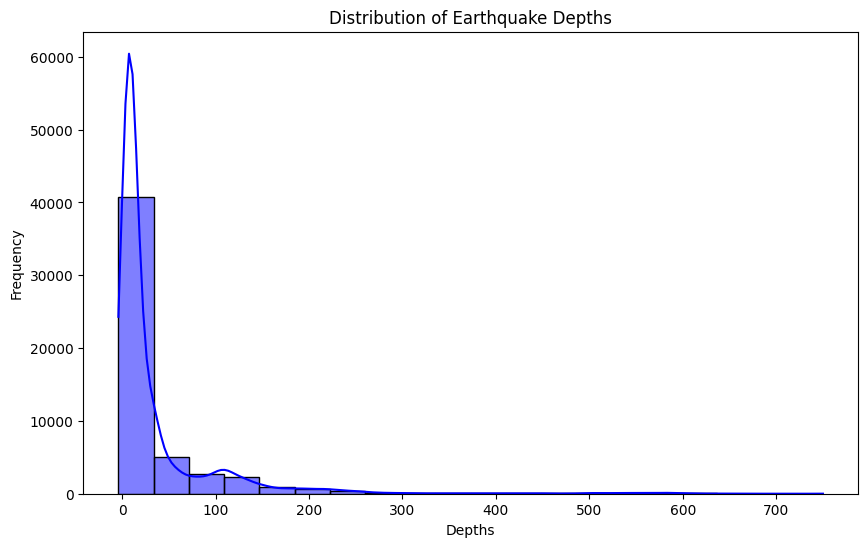

In [150]:
#KERNEL DENSITY ESTIMATION OF THE DEPTHS

plt.figure(figsize=(10, 6))
sns.histplot(eq_df['Depth'], bins=20, kde=True, color='blue')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depths')
plt.ylabel('Frequency')
plt.show()

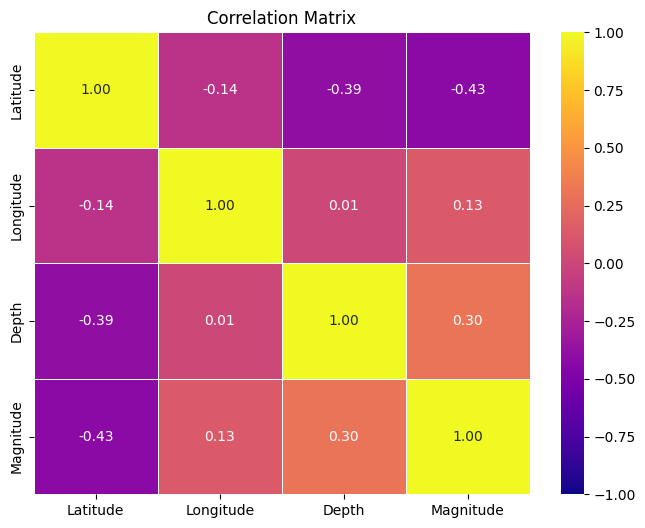

In [151]:
#HERE SHOW THE HETMAP FOR CORRELATIONSHIP BETWEEN ALL COLUMNS FROM THE DATA

numeric_columns = eq_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## **TEMPORAL ANALYSIS**

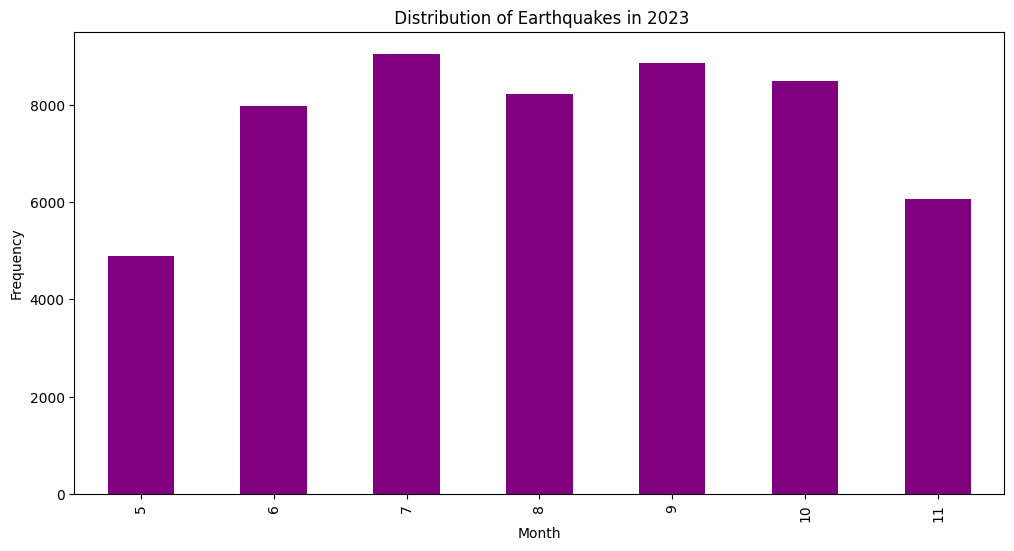

In [152]:
#BARPLOT OF DISTRIBUTION OF EARTHQUAKE IN 2023

eq_df['Date & Time'] = pd.to_datetime(eq_df['Date & Time'])
eq_df['month'] = eq_df['Date & Time'].dt.month

plt.figure(figsize=(12, 6))
eq_df['month'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title(' Distribution of Earthquakes in 2023')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

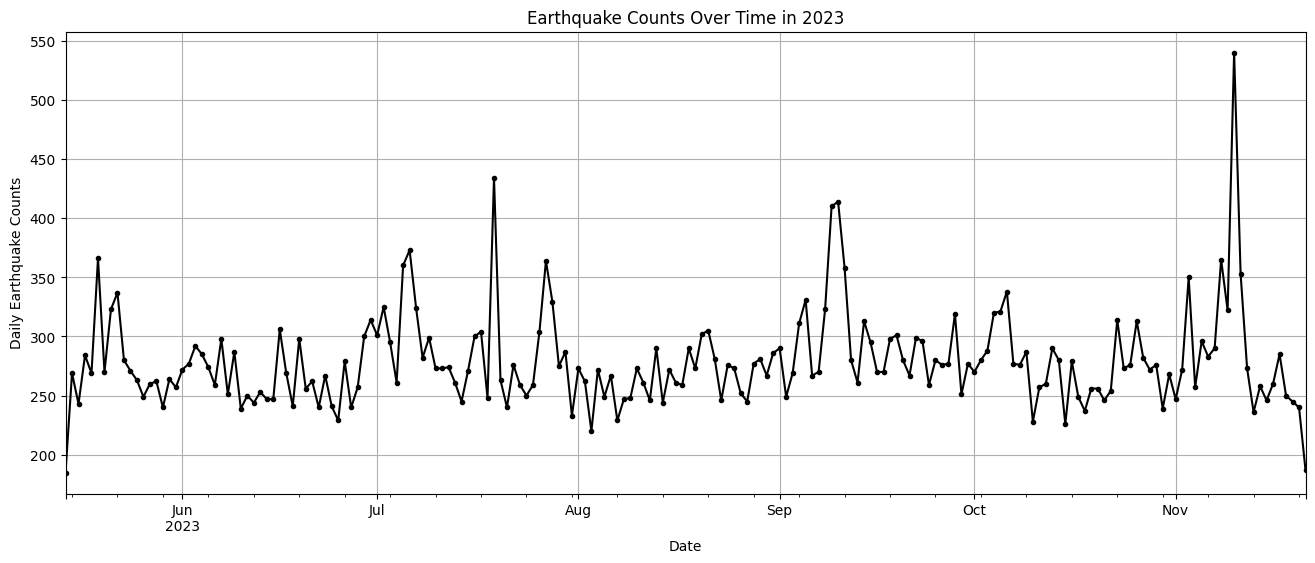

In [153]:
#LINEPLOT OF DISTRIBUTION OF EARTHQUAKE IN 2023

eq_df['Date & Time'] = pd.to_datetime(eq_df['Date & Time'])
daily_counts = eq_df.resample('D', on='Date & Time').size()
plt.figure(figsize=(16,6))
daily_counts.plot(kind='line', color='black', marker='o', markersize = 3)
plt.title('Earthquake Counts Over Time in 2023')
plt.xlabel('Date')
plt.ylabel('Daily Earthquake Counts')
plt.grid(True)
plt.show()

## **GEOSPATIAL ANALYSIS**

**MAGNITUDE & DEPTH OF EARTHQUAKES**

In [154]:
# MAGNITUDE VALUES OF THE PARTICULAR LOCATION FOR THW WORLD

fig = px.scatter_mapbox(eq_df[['Latitude','Longitude','Magnitude']],
                        lat="Latitude",
                        lon="Longitude",
                        color='Magnitude',
                        zoom=1, height=500)
fig.update_layout(mapbox_style="white-bg",title='Magnitude of Earthquakes',
mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.show()


In [155]:
# DEPTH VALUES OF THE PARTICULAR LOCATION FOR THW WORLD

fig = px.scatter_mapbox(eq_df[['Latitude','Longitude','Depth']],
                        lat="Latitude",
                        lon="Longitude",
                        color='Depth',
                        zoom=1, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [156]:
#MAKE A NEW DATAFRAME

new_df = eq_df.sort_index().copy()
new_df.head()

Date & Time  Latitude  Longitude  Depth  Magnitude     Lands  \
0 2023-11-21 17:43:00    31.592   -104.549      3        2.7   WESTERN   
1 2023-11-21 17:31:00   -24.200    -67.580    198        4.0    SALTA,   
2 2023-11-21 17:27:00    31.647   -104.017      5        2.9   WESTERN   
3 2023-11-21 17:01:00    46.345     13.601      0        0.8  SLOVENIA   
4 2023-11-21 16:56:00    -4.320    130.810     10        3.3     BANDA   

     Country  month  
0      TEXAS     11  
1  ARGENTINA     11  
2      TEXAS     11  
3   SLOVENIA     11  
4        SEA     11

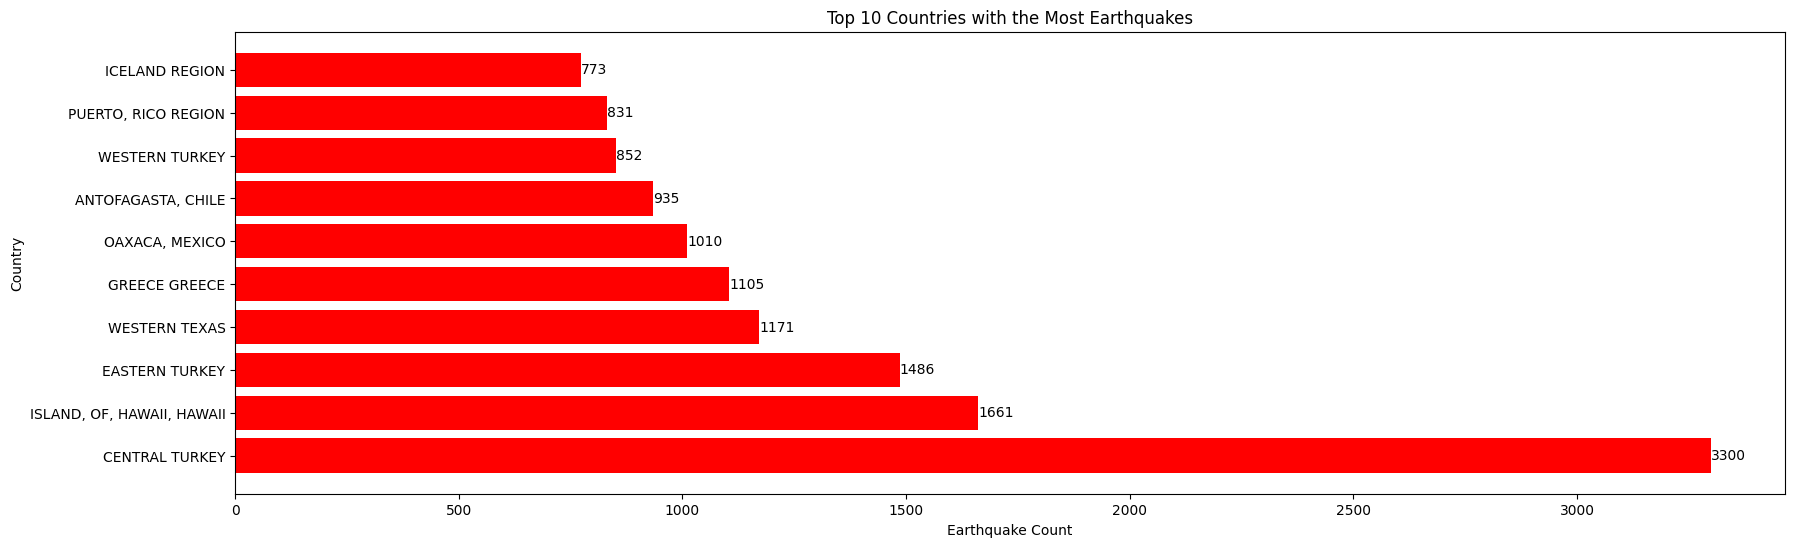

In [157]:
#MAKE A BARPLOT OF COUNT NO OF EARTHQUAKES FOR TOP 10 COUNTRIES

new_df['Location'] = new_df['Lands'] + ' ' + new_df['Country']
location_counts = new_df['Location'].value_counts()
top_locations = location_counts.head(10)

plt.figure(figsize=(20, 6))
bars = plt.barh(top_locations.index, top_locations, color='red')

plt.title(f'Top 10 Countries with the Most Earthquakes')
plt.xlabel('Earthquake Count')
plt.ylabel('Country')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='left', va='center', color='black')

plt.show()


In [158]:
#ASIA AND EUROPE LOCATION

asia_eup = [{'name': 'Europe', 'lat_range': (35, 70), 'lon_range': (-25, 45)},{'name': 'Asia', 'lat_range': (0, 75), 'lon_range': (30, 150)}]

In [159]:
def filter_continent(df, lat_range, lon_range):
    return df[(eq_df['Latitude'] >= lat_range[0]) & (eq_df['Latitude'] <= lat_range[1]) &
              (eq_df['Longitude'] >= lon_range[0]) & (eq_df['Longitude'] <= lon_range[1])]

In [160]:
#MAKE A MAP FOR EARTHQUAKE FOR A PARTICULAR LOCATION IN EUROPE AND ASIA

for p in asia_eup:
    df_continent = filter_continent(new_df, lat_range=p['lat_range'], lon_range=p['lon_range'])

    fig = px.scatter_mapbox(
        df_continent,
        lat="Latitude",
        lon="Longitude",
        color="Magnitude",
        zoom=2,
        color_continuous_scale='jet',
        hover_name='Country',
        hover_data=["Depth"],
        size_max=15,
        mapbox_style="open-street-map",
        title=f'Earthquakes in {p["name"]}'
    )

    fig.update_layout(
        title=dict(text=f'Earthquakes in {p["name"]}', x=0.5, font=dict(size=20)),
        width=1000,
        height=600
    )

    fig.show()
